In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

import pickle

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [3]:
data = pd.concat(
    [
        pd.read_csv('../data_files/logistic data/train.csv'),
        pd.read_csv('../data_files/logistic data/test.csv'),
    ], 
    axis=0)
data.reset_index(drop=True, inplace=True)
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
def handle_null_values(df):
    """
    Check for null values in the DataFrame, display rows with null values, and remove those rows.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with rows containing null values removed.
    """
    # Check for null values
    null_rows = df[df.isnull().any(axis=1)]

    if null_rows.empty:
        print("No null values found in the DataFrame.")
    else:
        # Drop rows with null values
        df = df.dropna()
        print("Null values have been removed.")

    return df

In [5]:
data = handle_null_values(data)

Null values have been removed.


In [6]:


def handle_duplicate_values(df):
    """
    Check for duplicate rows in the DataFrame, display duplicate rows if any, and remove those rows.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with duplicate rows removed.
    """
    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]

    if duplicate_rows.empty:
        print("No duplicate values found in the DataFrame.")
    else:
        print("Duplicate rows:")
        print(duplicate_rows)

        df = df.drop_duplicates(keep='first')
        print("Duplicate values have been removed.")

    return df



In [7]:
# Check for duplicate values and remove duplicate rows
data = handle_duplicate_values(data)

No duplicate values found in the DataFrame.


In [8]:


def handle_customer_id(df):
    """
    Check for duplicate Customer ID values in the DataFrame.
    If no duplicate Customer IDs are found, remove the Customer ID column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with Customer ID column removed if no duplicates are found.
    """
    # Check for duplicate Customer ID values
    if df['CustomerID'].duplicated().any():
        print("Duplicate Customer IDs found. Keeping the Customer ID column.")
    else:
        print("No duplicate Customer IDs found. Removing the Customer ID column.")
        df = df.drop(columns=['CustomerID'])

    return df




In [9]:
# Check for duplicate Customer IDs and remove Customer ID column if no duplicates are found
data = handle_customer_id(data)

Duplicate Customer IDs found. Keeping the Customer ID column.


In [10]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

In [11]:

def convert_numeric_columns_to_int(df):
    """
    Convert numeric columns in a DataFrame to integer type where possible.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with numeric columns converted to integer type where applicable.
    """
    for col in df.select_dtypes(include=['float', 'int']).columns:
        # Check if column can be converted to integers without losing information
        if (df[col] % 1 == 0).all():  # Check if all values are whole numbers
            df[col] = df[col].astype(int)
            print(f"Converted column '{col}' to integer type.")
        else:
            print(f"Column '{col}' contains non-whole numbers and cannot be safely converted to integer type.")
    
    return df




In [12]:
data.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [13]:
data = convert_numeric_columns_to_int(data)
data.head()

Converted column 'customerid' to integer type.
Converted column 'age' to integer type.
Converted column 'tenure' to integer type.
Converted column 'usage_frequency' to integer type.
Converted column 'support_calls' to integer type.
Converted column 'payment_delay' to integer type.
Column 'total_spend' contains non-whole numbers and cannot be safely converted to integer type.
Converted column 'last_interaction' to integer type.
Converted column 'churn' to integer type.


,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


# Data Visualization

In [14]:
# Function to create a bar chart
def create_bar_chart(df, x, y):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=x, y=y)
    plt.title(f'Bar Chart of {y} vs {x}')
    plt.show()

# Function to create a line chart
def create_line_chart(df, x, y):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y)
    plt.title(f'Line Chart of {y} vs {x}')
    plt.show()

# Function to create a pie chart
def create_pie_chart(df, column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()

# Function to create a boxplot
def create_boxplot(df, x, y):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'Boxplot of {y} by {x}')
    plt.show()


In [15]:

import ipywidgets as widgets
from IPython.display import display

df = pd.DataFrame(data)

# Widgets for user inputs
chart_type_widget = widgets.Dropdown(options=['Bar Chart', 'Line Chart', 'Pie Chart', 'Boxplot'], description='Chart Type:')
x_feature_widget = widgets.Dropdown(options=df.columns, description='X Feature:')
y_feature_widget = widgets.Dropdown(options=df.columns, description='Y Feature:')
generate_button = widgets.Button(description='Generate Chart')

# Function to update widgets visibility
def update_widgets(*args):
    chart_type = chart_type_widget.value
    if chart_type == 'Pie Chart':
        x_feature_widget.layout.display = 'none'
        y_feature_widget.layout.display = 'none'
    else:
        x_feature_widget.layout.display = 'block'
        y_feature_widget.layout.display = 'block'

chart_type_widget.observe(update_widgets, 'value')

# Function to generate the chart based on user inputs
def on_generate_button_clicked(b):
    chart_type = chart_type_widget.value
    x_feature = x_feature_widget.value
    y_feature = y_feature_widget.value

    if chart_type == 'Bar Chart':
        create_bar_chart(df, x_feature, y_feature)
    elif chart_type == 'Line Chart':
        create_line_chart(df, x_feature, y_feature)
    elif chart_type == 'Pie Chart':
        create_pie_chart(df, x_feature)  # Using x_feature as the column for pie chart
    elif chart_type == 'Boxplot':
        create_boxplot(df, x_feature, y_feature)

generate_button.on_click(on_generate_button_clicked)

# Display widgets
display(chart_type_widget, x_feature_widget, y_feature_widget, generate_button)

Dropdown(description='Chart Type:', options=('Bar Chart', 'Line Chart', 'Pie Chart', 'Boxplot'), value='Bar Ch…

Dropdown(description='X Feature:', options=('customerid', 'age', 'gender', 'tenure', 'usage_frequency', 'suppo…

Dropdown(description='Y Feature:', options=('customerid', 'age', 'gender', 'tenure', 'usage_frequency', 'suppo…

Button(description='Generate Chart', style=ButtonStyle())

In [16]:
# Creating custom functions to visualize features

def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of cutomer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of cutomer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")
    
def make_boxplot(df, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(df, x=feature)
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

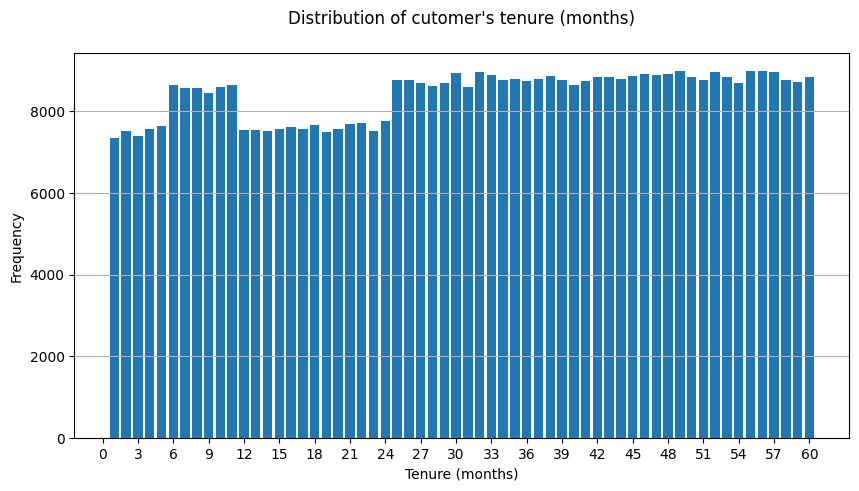

Distribution of cutomer's tenure (months): 31.35 ± 32.00 months
Median: 32.00 months
Minimum: 1 months
Maximum: 60 months

-0.070 Skewness



In [17]:
make_barplot(df, 'tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months')

In [18]:
data.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


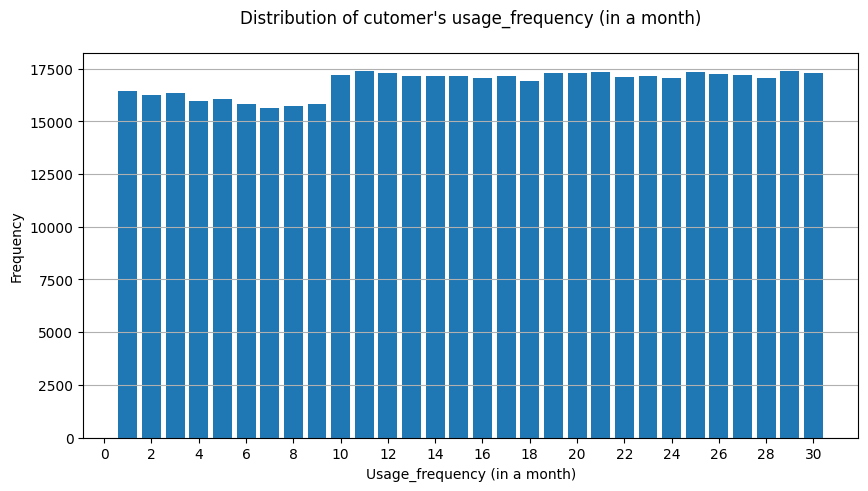

Distribution of cutomer's usage_frequency (in a month): 15.71 ± 16.00 times
Median: 16.00 times
Minimum: 1 times
Maximum: 30 times

-0.034 Skewness



In [19]:
make_barplot(df, 'usage_frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)')

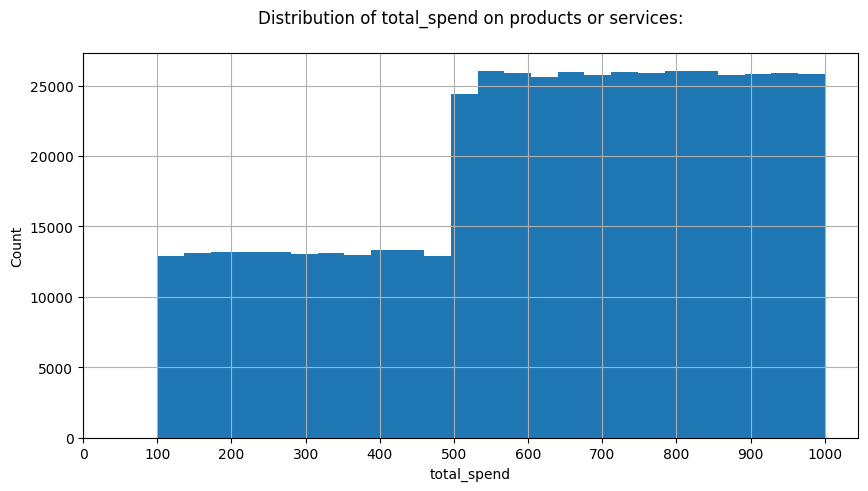

Distribution of total_spend on products or services: 620.07 ± 648.90 USD
Median: 648.90 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.395 Skewness



In [20]:
make_histogram(df, 'total_spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

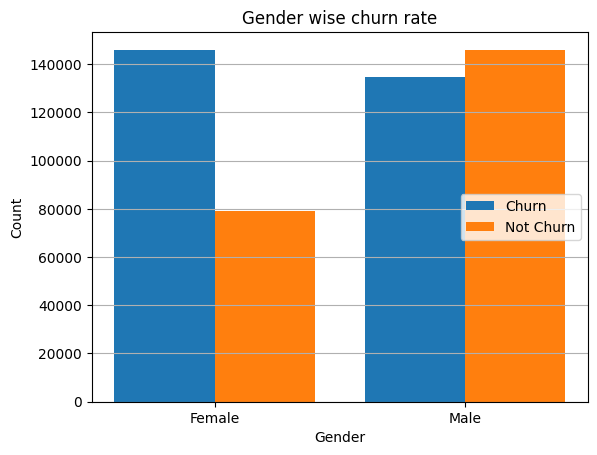

In [21]:
gender_churn = df.groupby(['gender', 'churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

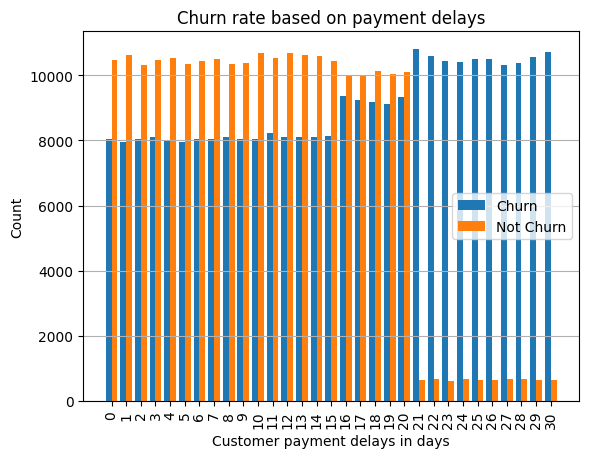

In [22]:
filtered = df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

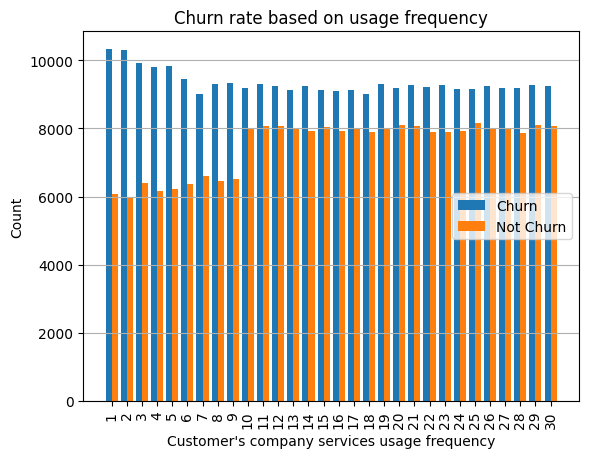

In [23]:
filtered = df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

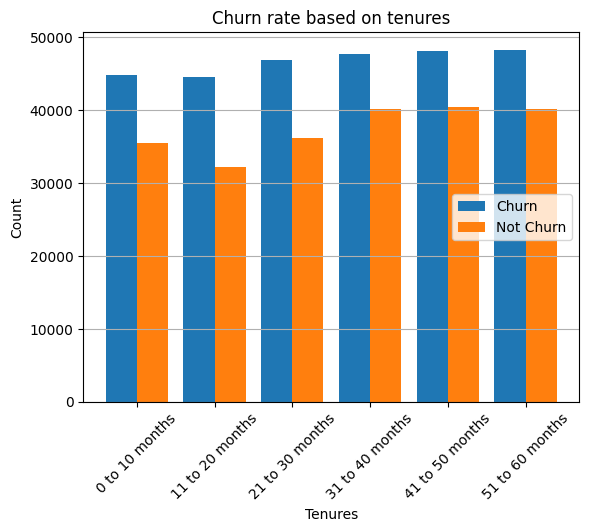

In [24]:
def categorize_age(age):
    if 0 <= age <= 10:
        return '0 to 10 months'
    elif 11 <= age <= 20:
        return '11 to 20 months'
    elif 21 <= age <= 30:
        return '21 to 30 months'
    elif 31 <= age <= 40:
        return '31 to 40 months'
    elif 41 <= age <= 50:
        return '41 to 50 months'
    elif 51 <= age <= 60:
        return '51 to 60 months'
    else:
        pass # For nan values

filtered = df.copy()
filtered['tenure_segmentation'] = df['tenure'].apply(categorize_age)
filtered = filtered.groupby(['tenure_segmentation', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

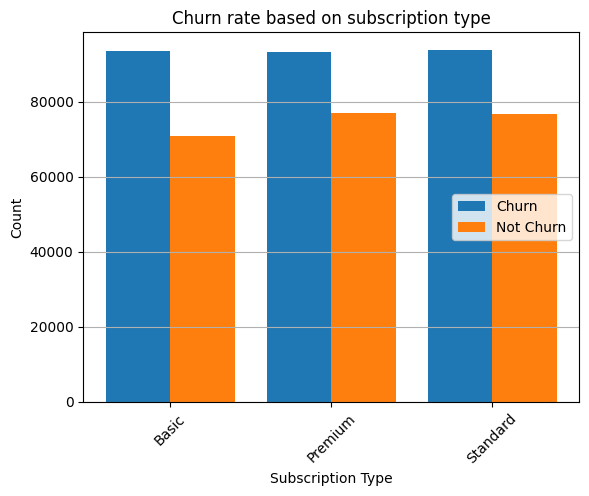

In [25]:
filtered = df.groupby(['subscription_type', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

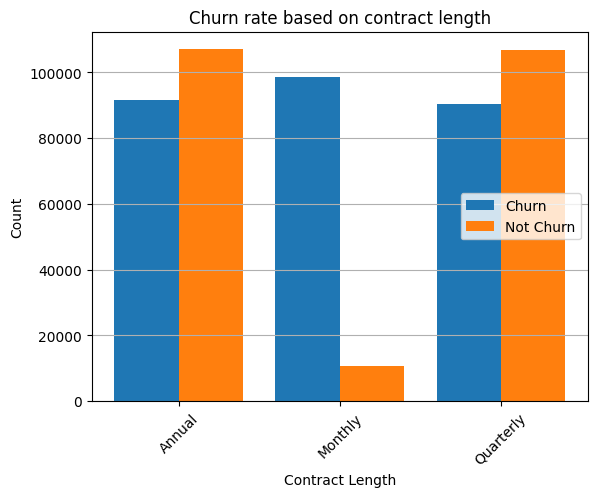

In [26]:
filtered = df.groupby(['contract_length', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

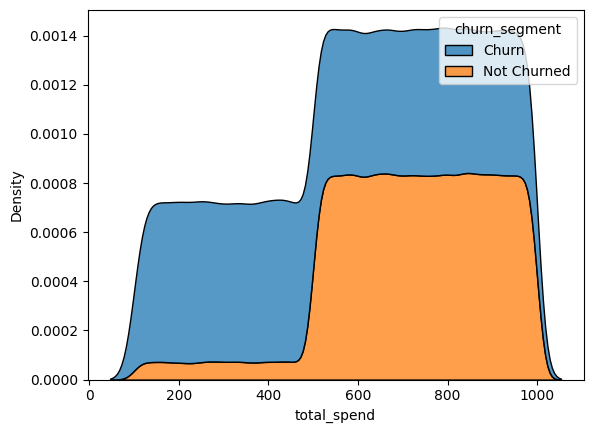

In [27]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]

sns.kdeplot(data=filtered, x="total_spend", hue="churn_segment", multiple="stack")
plt.show()

In [28]:
independent_features_df = df.select_dtypes(include=['number']).copy().drop(columns=['churn'])

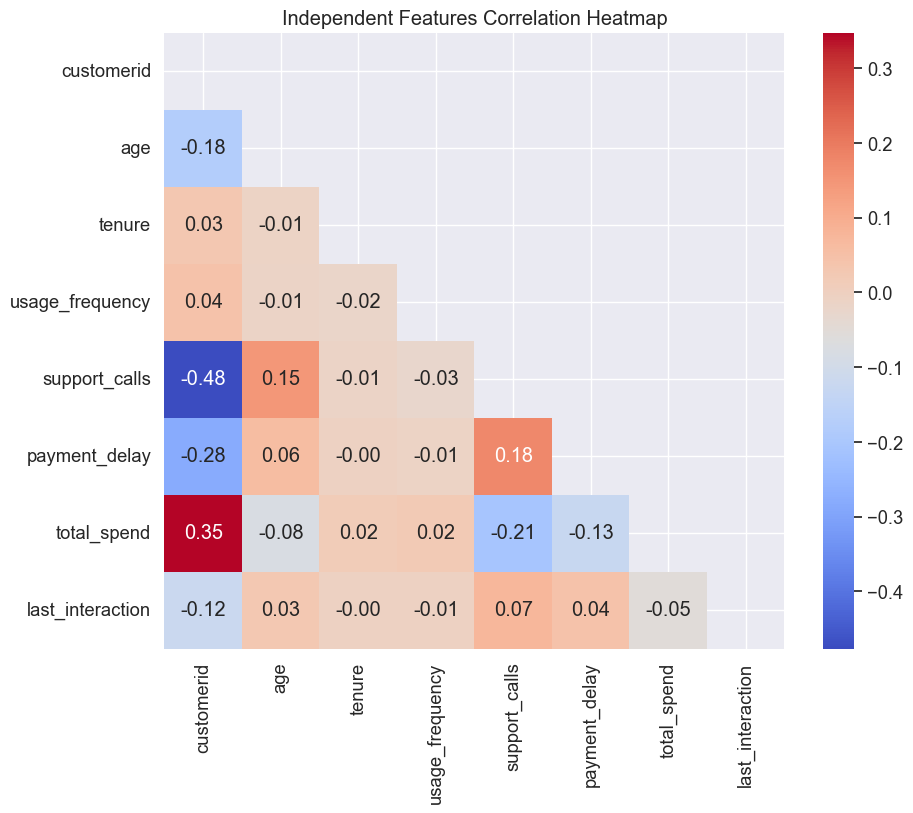

In [29]:
corr_matrix = independent_features_df.corr()

# Creating a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Independent Features Correlation Heatmap")
plt.show()


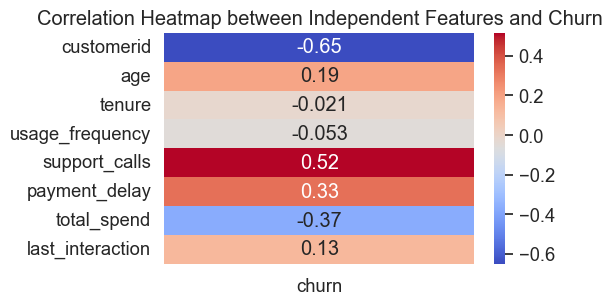

In [30]:
correlation_data = df.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']


# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

# Data Modeling

In [31]:
y = df['churn']
X = df.drop(columns='churn')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Reset the index of the resulting DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [33]:
encoder = OneHotEncoder(sparse_output=False)

encoder.fit(X_train[['gender', 'subscription_type', 'contract_length']])

OneHotEncoder(sparse_output=False)

In [34]:
feature_names = encoder.get_feature_names_out(['gender', 'subscription_type', 'contract_length'])
feature_names

array(['gender_Female', 'gender_Male', 'subscription_type_Basic',
       'subscription_type_Premium', 'subscription_type_Standard',
       'contract_length_Annual', 'contract_length_Monthly',
       'contract_length_Quarterly'], dtype=object)

In [35]:
train_categorical_one_encoded_data = encoder.transform(X_train[['gender', 'subscription_type', 'contract_length']])
train_OHE_df = pd.DataFrame(train_categorical_one_encoded_data, columns=feature_names)

test_categorical_one_encoded_data = encoder.transform(X_test[['gender', 'subscription_type', 'contract_length']])
test_OHE_df = pd.DataFrame(test_categorical_one_encoded_data, columns=feature_names)

In [36]:
X_train = X_train.drop(columns=['gender', 'subscription_type', 'contract_length'])
X_test = X_test.drop(columns=['gender', 'subscription_type', 'contract_length'])

In [37]:
X_train = pd.concat([X_train, train_OHE_df], axis=1)
X_test = pd.concat([X_test, test_OHE_df], axis=1)

# Logistic Regression

In [38]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

In [39]:
def k_fold_cross_validation_with_metrics(classifier, X, y, k_folds=5):
    
    # Initializing stratified k-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to store the evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Append the metrics to their respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate and print the mean of each metric across all folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    print("Mean Metrics Across Folds:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean Precision: {mean_precision:.2f}")
    print(f"Mean Recall: {mean_recall:.2f}")

# Example usage:
# classifier = YourClassifier()  # Replace with your classifier of choice
# k_fold_cross_validation_with_metrics(classifier, X, y)


In [40]:
model = LogisticRegression()

k_fold_cross_validation_with_metrics(model, X_train, y_train)

/Users/shikshit/anaconda3/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Metrics Across Folds:
Mean Accuracy: 0.86
Mean Precision: 0.87
Mean Recall: 0.88


/Users/shikshit/anaconda3/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Gaussian Naive Bayes

gnb = GaussianNB()

k_fold_cross_validation_with_metrics(gnb, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.88
Mean Precision: 0.88
Mean Recall: 0.91


In [42]:

naive_bayes_model = MultinomialNB()

k_fold_cross_validation_with_metrics(naive_bayes_model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.75
Mean Precision: 0.84
Mean Recall: 0.69


In [43]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

k_fold_cross_validation_with_metrics(decision_tree_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.94
Mean Precision: 0.94
Mean Recall: 0.94


In [44]:
xgb_classifier = xgb.XGBClassifier(random_state=42)

k_fold_cross_validation_with_metrics(xgb_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.94
Mean Precision: 0.94
Mean Recall: 0.94


In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

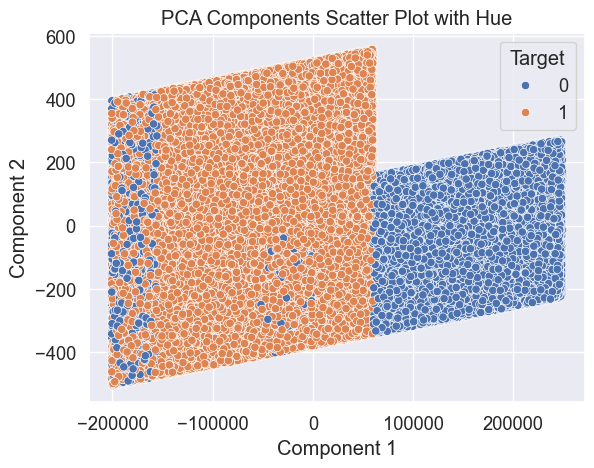

In [46]:
data = {
    'Feature_1': X_pca[:, 0],
    'Feature_2': X_pca[:, 1],
    'Target': y_train
}

pca_df = pd.DataFrame(data)

sns.scatterplot(data=pca_df, x='Feature_1', y='Feature_2', hue='Target')

# Set plot labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Components Scatter Plot with Hue')

# Show the plot
plt.legend(title='Target')
plt.show()

# Validation

In [47]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
# Testing decision trees

y_pred = decision_tree_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.93
Precision: 0.94
Recall: 0.94

Confusion Matrix:
[[41408  3351]
 [ 3237 53046]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     44759
           1       0.94      0.94      0.94     56283

    accuracy                           0.93    101042
   macro avg       0.93      0.93      0.93    101042
weighted avg       0.93      0.93      0.93    101042



In [52]:

y_pred = xgb_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.94
Precision: 0.94
Recall: 0.94

Confusion Matrix:
[[41579  3180]
 [ 3285 52998]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     44759
           1       0.94      0.94      0.94     56283

    accuracy                           0.94    101042
   macro avg       0.94      0.94      0.94    101042
weighted avg       0.94      0.94      0.94    101042

